In [1]:
import sys
import os
from anlffr.helper import biosemi2mne as bs
from anlffr.preproc import find_blinks
from mne import compute_proj_epochs
import numpy as np
import mne
from scipy.io import savemat
import fnmatch
import glob
from mne.datasets import fetch_fsaverage


In [2]:
chin='S363'
dir='//datadepot.rcac.purdue.edu/depot/heinz/data/UserTESTS/AM/ABR/'
bdfs=glob.glob('%s%s*.bdf' % (dir, chin))
ss=[sum(ord(char) for char in string) for string in bdfs]
kp=(np.argsort(ss)).tolist()
bdfs=[bdfs[ii] for ii in kp]
rawlist=[]
eveslist=[]
for fn in bdfs:
    rawtemp,evestemp=bs.importbdf(fn,verbose='DEBUG',refchans=['EXG1', 'EXG2'])
    rawlist.append(rawtemp)
    eveslist.append(evestemp)
raw,eves=mne.concatenate_raws(rawlist,events_list=eveslist)

Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\ABR\S363_ABR.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8716287  =      0.000 ...   532.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of 130816 (consider using initial_event=True to detect this event)
9607 events found on stim channel Status
Event IDs: [  3   9  48 144 253]
Loading a default 32 channel montage.
Extracting EDF parameters from \\datadepot.rcac.purdue.edu\depot\heinz\data\UserTESTS\AM\ABR\S363_ABR+001.bdf...
BDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 8716287  =      0.000 ...   532.000 secs...
Re-referencing data to: EXG1 EXG2EEG channel type selected for re-referencing
Applying a custom ('EEG',) refere

In [3]:
dfs=np.diff(eves[:,0])
id=np.where(dfs>2000)[0]+1
iter_trigs=eves[id]
#%matplotlib widget
#plt.figure()
#plt.plot(df[1:])
#epochs=mne.Epochs(raw, iter_trigs, tmin=-0.2, tmax=2.0, baseline=(-0.2, 0), preload=True)



In [ ]:
kps=[]
for ii in range(len(id)-1):
    kps.append((eves[id[ii+1]-1,0]-eves[id[ii],0])/raw.info["sfreq"])

kp1=[]
for ii in range(len(id)-1):
    kp1.append((eves[id[ii+1],0]-eves[id[ii+1]-1,0])/raw.info["sfreq"])


In [12]:
np.where(eves[:,2]==64)

(array([19422]),)

In [ ]:
kp1

C:\Users\amukesh\AppData\Roaming\Python\Python310\site-packages\traitlets\traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


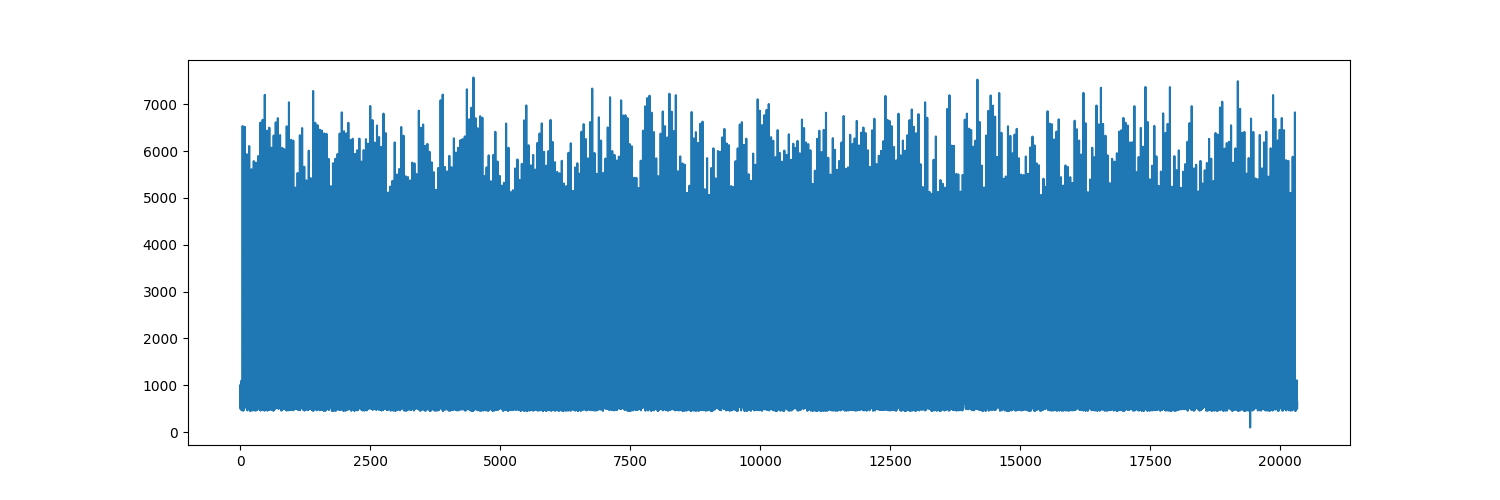

In [6]:
import matplotlib.pyplot as plt
dfs=np.diff(eves[:,0])
%matplotlib widget
plt.figure(figsize=(15,5))
plt.plot(dfs[1:])


In [4]:
fs_dir = fetch_fsaverage(verbose=True)
subjects_dir = os.path.dirname(fs_dir)
subject = "fsaverage"
trans = "fsaverage"  # MNE has a built-in fsaverage transformation
src = os.path.join(fs_dir, "bem", "fsaverage-ico-5-src.fif")
bem = os.path.join(fs_dir, "bem", "fsaverage-5120-5120-5120-bem-sol.fif")
mri = os.path.join(fs_dir, "mri", "aseg.mgz")
montage = mne.channels.make_standard_montage("biosemi32")
raw.set_eeg_reference(projection=True)
mdc = dict(zip(raw.ch_names,montage.ch_names))
raw.rename_channels(mdc)
raw.set_montage(montage,on_missing='ignore')
raw.pick_channels(montage.ch_names)

raw_ab   = raw.copy().filter(100., 1000., fir_design='firwin')  # ABR band
raw_cort = raw.copy().filter(1.,   30.,   fir_design='firwin')  # AEP band


surf_src = mne.setup_source_space(
    subject, spacing='oct5',
    subjects_dir=subjects_dir, add_dist=False
)

vol_src = mne.setup_volume_source_space(
    subject,
    pos=5.0,                   # 5 mm grid spacing
    mri=mri,
    subjects_dir=subjects_dir,
    volume_label=['Brain-Stem']
)

0 files missing from root.txt in C:\Users\amukesh\mne_data\MNE-fsaverage-data
0 files missing from bem.txt in C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage
EEG channel type selected for re-referencing


Adding average EEG reference projection.
1 projection items deactivated
Average reference projection was added, but has not been applied yet. Use the apply_proj method to apply it.
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 1e+02 - 1e+03 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 100.00
- Lower transition bandwidth: 25.00 Hz (-6 dB cutoff frequency: 87.50 Hz)
- Upper passband edge: 1000.00 Hz
- Upper transition bandwidth: 250.00 Hz (-6 dB cutoff frequency: 1125.00 Hz)
- Filter length: 2163 samples (0.132 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    3.5s


Filtering raw data in 3 contiguous segments
Setting up band-pass filter from 1 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 54069 samples (3.300 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    9.2s


Setting up the source space with the following parameters:

SUBJECTS_DIR = C:\Users\amukesh\mne_data\MNE-fsaverage-data
Subject      = fsaverage
Surface      = white
Octahedron subdivision grade 5

>>> 1. Creating the source space...

Doing the octahedral vertex picking...
Loading C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage\surf\lh.white...
Mapping lh fsaverage -> oct (5) ...
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage\surf\lh.sphere...
Setting up the triangulation for the decimated surface...
loaded lh.white 1026/163842 selected to source space (oct = 5)

Loading C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage\surf\rh.white...
Mapping rh fsaverage -> oct (5) ...
    Triangle neighbors and vertex normals...
Loading geometry from C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage\surf\rh.sphere...
Setting up the triangulation for the decimated surface...
loaded rh.white 1026/163842 select

In [6]:
fwd_surf = mne.make_forward_solution(raw.info, trans=trans, src=surf_src, bem=bem, eeg=True, meg=False)
fwd_vol = mne.make_forward_solution(raw.info, trans=trans, src=surf_src+vol_src, bem=bem, meg=False, eeg=True)

tmin, tmax = -0.2, 2.0
reject = dict(eeg=200e-6)
epochs_ab = mne.Epochs(raw_ab, iter_trigs, tmin=tmin, tmax=tmax, baseline=(tmin,0),reject=reject, preload=True)
epochs_cort = mne.Epochs(raw_cort, iter_trigs, tmin=tmin, tmax=tmax, baseline=(tmin,0),reject=reject, preload=True)

noise_cov_ab = mne.compute_covariance(epochs_ab, tmin=tmin, tmax=tmax, method='empirical', rank=None)
noise_cov_cort = mne.compute_covariance(epochs_cort, tmin=tmin, tmax=tmax, method='empirical', rank=None)

inv_ab = mne.minimum_norm.make_inverse_operator(raw.info, fwd_vol, noise_cov_ab, loose=1.0, depth=0.8)
inv_cort = mne.minimum_norm.make_inverse_operator(raw.info, fwd_surf, noise_cov_cort, loose=0.2, depth=0.8)

evoked_cort = epochs_cort.average()
evoked_ab = epochs_ab.average()
n_proj = 6
data = evoked_ab.data
C = np.cov(data)
U,S,Vt = np.linalg.svd(C)
projectors = U[:, :n_proj]
P = np.eye(data.shape[0]) - projectors @ projectors.T
denoised_data = P @ data
evoked_ab_sup = evoked_ab.copy()
evoked_ab_sup.data = denoised_data

stc_ab = mne.minimum_norm.apply_inverse(evoked_ab_sup, inv_ab, lambda2=1.0 / 9.0, method='dSPM')
stc_cort = mne.minimum_norm.apply_inverse(evoked_cort, inv_cort, lambda2=1.0 / 9.0, method='dSPM')


Source space          : <SourceSpaces: [<surface (lh), n_vertices=163842, n_used=1026>, <surface (rh), n_vertices=163842, n_used=1026>] MRI (surface RAS) coords, subject 'fsaverage', ~25.1 MiB>
MRI -> head transform : c:\Users\amukesh\AppData\Local\Programs\Python\Python310\lib\site-packages\mne\data\fsaverage\fsaverage-trans.fif
Measurement data      : instance of Info
Conductor model   : C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage\bem\fsaverage-5120-5120-5120-bem-sol.fif
Accurate field computations
Do computations in head coordinates
Free source orientations

Read 2 source spaces a total of 2052 active source locations

Coordinate transformation: MRI (surface RAS) -> head
    0.999994 0.003552 0.000202      -1.76 mm
    -0.003558 0.998389 0.056626      31.09 mm
    -0.000001 -0.056626 0.998395      39.60 mm
    0.000000 0.000000 0.000000       1.00

Read  32 EEG channels from info
Head coordinate coil definitions created.
Source spaces are now in head coordinates.

Setting

In [7]:
labels = mne.read_labels_from_annot(
    subject, parc='aparc',
    subjects_dir=subjects_dir
)
aud_labels = [lbl for lbl in labels
              if lbl.name in ('transversetemporal-lh','transversetemporal-rh')]

# extract cortical time course (mean-flip for sign consistency)
aud_tc = mne.extract_label_time_course([stc_cort], src=surf_src, labels=aud_labels,mode='mean_flip')[0]

vol_labels = mne.get_volume_labels_from_src(surf_src+vol_src,subject,subjects_dir)
bs_label = [lbl for lbl in vol_labels if lbl == "Brain-Stem"]
bs_tc = mne.extract_label_time_course([stc_ab], src=surf_src+vol_src, labels=bs_label,mode='max')[0]

Reading labels from parcellation...
   read 35 labels from C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage\label\lh.aparc.annot
   read 34 labels from C:\Users\amukesh\mne_data\MNE-fsaverage-data\fsaverage\label\rh.aparc.annot
Extracting time courses for 2 labels (mode: mean_flip)
Extracting time courses for 1 labels (mode: max)


C:\Users\amukesh\AppData\Roaming\Python\Python310\site-packages\traitlets\traitlets.py:1385: DeprecationWarning: Passing unrecognized arguments to super(Toolbar).__init__().
NavigationToolbar2WebAgg.__init__() missing 1 required positional argument: 'canvas'
This is deprecated in traitlets 4.2.This error will be raised in a future release of traitlets.
  warn(


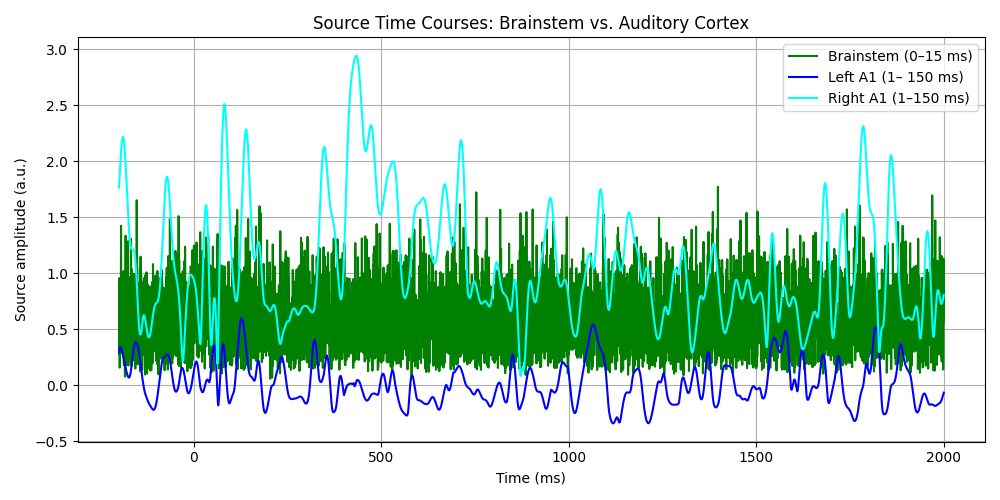

In [8]:
import matplotlib.pyplot as plt
%matplotlib widget
plt.figure(figsize=(10,5))


# Brainstem (only early window)
plt.plot(
    stc_ab.times * 1e3, bs_tc.T,
    label='Brainstem (0–15 ms)', color='green'
)

# Auditory cortex (full AEP window)
plt.plot(
    stc_cort.times * 1e3, aud_tc[0].T,
    label='Left A1 (1– 150 ms)', color='blue'
)
plt.plot(
    stc_cort.times * 1e3, aud_tc[1].T,
    label='Right A1 (1–150 ms)', color='cyan'
)

plt.xlabel('Time (ms)')
plt.ylabel('Source amplitude (a.u.)')
plt.title('Source Time Courses: Brainstem vs. Auditory Cortex')
plt.legend(loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


In [51]:
vol_stc_data.shape[0] == len(vol_src[0]['vertno'])

True

In [11]:
brain = stc_cort.plot(src=surf_src, subject=subject, subjects_dir=subjects_dir, surface="white",hemi="both")

Using control points [2.16053271 2.35899173 3.65623475]
False


In [ ]:

x[0]=aud_tc[0].T
x[1]=aud_tc[1].T
x[2]=bs_tc.T





IndexError: list assignment index out of range

In [50]:
x=np.arange(6)
x=list(x)

print(sorted(x,reverse=True))

[np.int64(5), np.int64(4), np.int64(3), np.int64(2), np.int64(1), np.int64(0)]


In [16]:
surf_len = sum(len(s['vertno']) for s in surf_src)
vol_stc_data = stc_ab.data[surf_len:, :]
vol_times = stc_ab.times

from mne import VolSourceEstimate
vol_stc = VolSourceEstimate(vol_stc_data, vertices=list(vol_src[0]['vertno']), tmin=stc_ab.tmin, tstep=stc_ab.tstep, subject=subject)

ValueError: diff requires input that is at least one dimensional

In [15]:
from mne import VolSourceEstimate

vol_stc = VolSourceEstimate(
    vol_stc_data, 
    vertices=[vol_src[0]['vertno']],  # Always wrap in a list
    tmin=stc_ab.tmin, 
    tstep=stc_ab.tstep, 
    subject=subject
)

In [18]:
vol_stc.plot(
    src=vol_src, 
    subject=subject, 
    subjects_dir=subjects_dir,
    mode='stat_map', 
    initial_time=0.006,
)

HeaderDataError: shape (41, 41, 41, 36046) does not fit in dim datatype

In [32]:
vol_verts = vol_src[0]['vertno']
len(vol_verts) == vol_stc_data.shape[0]
vol_stc = VolSourceEstimate(
        vol_stc_data,
        vertices=[vol_verts],  # Note: needs to be a list of arrays
        tmin=stc_ab.tmin,
        tstep=stc_ab.tstep,
        subject=subject
    )

vol_stc.plot(src=vol_src, subject=subject, subjects_dir=subjects_dir)

HeaderDataError: shape (41, 41, 41, 36046) does not fit in dim datatype

In [ ]:
evoked_ab_sup = mne.preprocessing.cortical_signal_suppression(
    evoked_ab,
    picks="eeg",
    mag_picks=[],
    grad_picks=[],
    n_proj=6
)

In [ ]:
data = evoked_ab.data
C = np.cov(data)
U,S,Vt = np.linalg.svd(C)
projectors = U[:, :6]
P = np.eye(data.shape[0]) - projectors @ projectors.T
denoised_data = P @ data
evoked_ab_sup = evoked_ab.copy()
evoked_ab_sup.data = denoised_data


In [ ]:
data.shape